In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt 

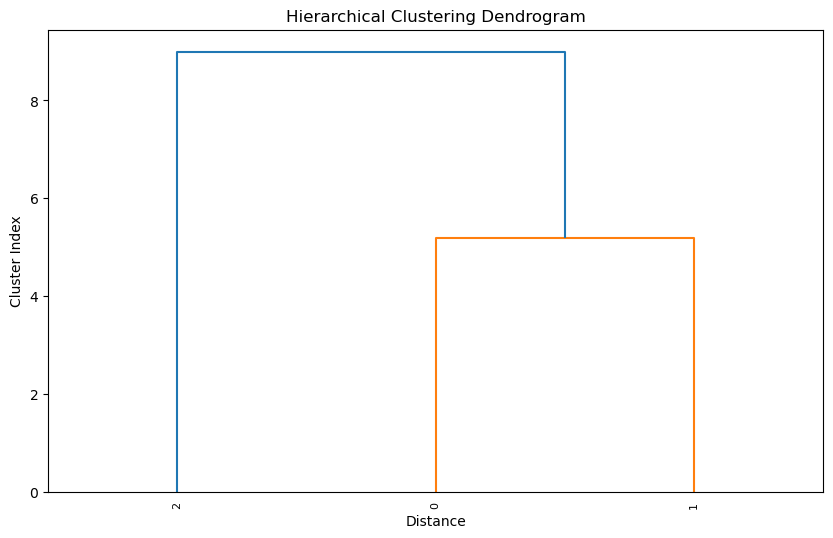

In [8]:
def calculate_dendogram(leaves, method='ward', metric='euclidean', plot=True):
    leaves_array = np.array(leaves)
    dist_matrix = pdist(leaves_array)
    linkage_matrix = linkage(dist_matrix, method=method, metric=metric)
    plt.figure(figsize=(10,6))
    dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8.)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Distance')
    plt.ylabel('Cluster Index')
    plt.show()
    return

leaves = [[1,2,3],[4,5,6],[7,8,9]]
calculate_dendogram(leaves)

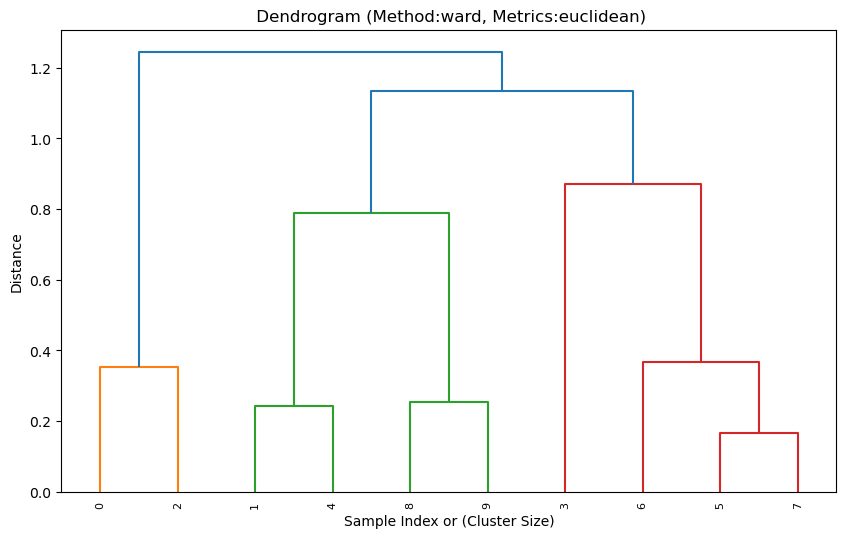

In [4]:
def cal_dendrogram(data, method='ward', metric='euclidean',plot=True):
    z = linkage(data, method=method, metric=metric)
    if plot:
        plt.figure(figsize=(10,6))
        dendrogram(z, leaf_rotation=90., leaf_font_size=8.)
        plt.title(f" Dendrogram (Method:{method}, Metrics:{metric})")
        plt.xlabel("Sample Index or (Cluster Size)")
        plt.ylabel("Distance")
        plt.show()
        return z

if __name__ == "__main__":
    np.random.seed(42)
    data = np.random.rand(10,3)
    z = cal_dendrogram(data)


In [18]:
import pandas as pd 
import os 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage
os.environ['OMP_NUM_THREADS'] = '1'

In [15]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "Iris.csv"
file_folder = os.path.join(folder,file)
df = pd.read_csv(file_folder)

In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# K-Means Clusttering :
features = df.drop(columns=['Id','Species'])
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_lb = kmeans.fit_predict(features)
df['kmeans_cluster']= kmeans_lb

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


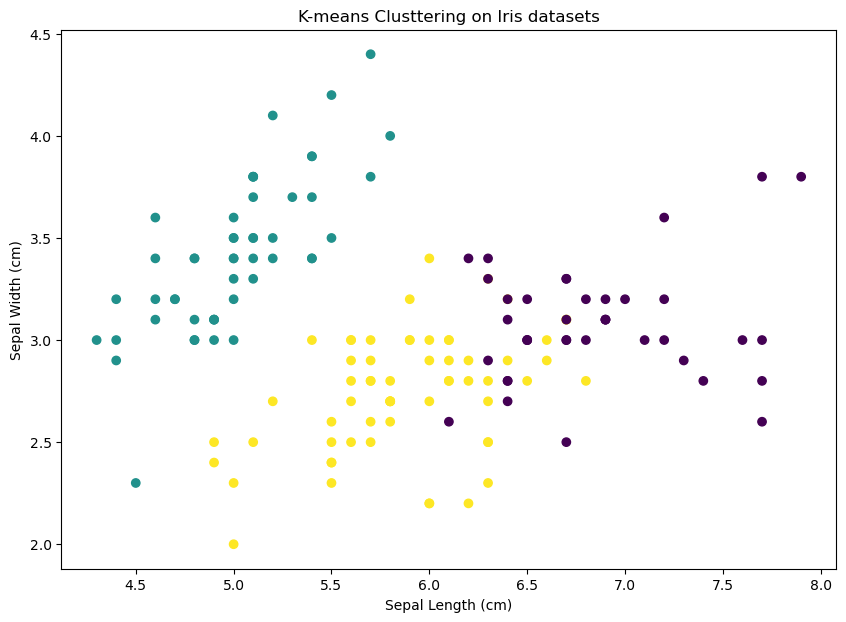

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'], c=kmeans_lb, cmap="viridis")
plt.title("K-means Clusttering on Iris datasets")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

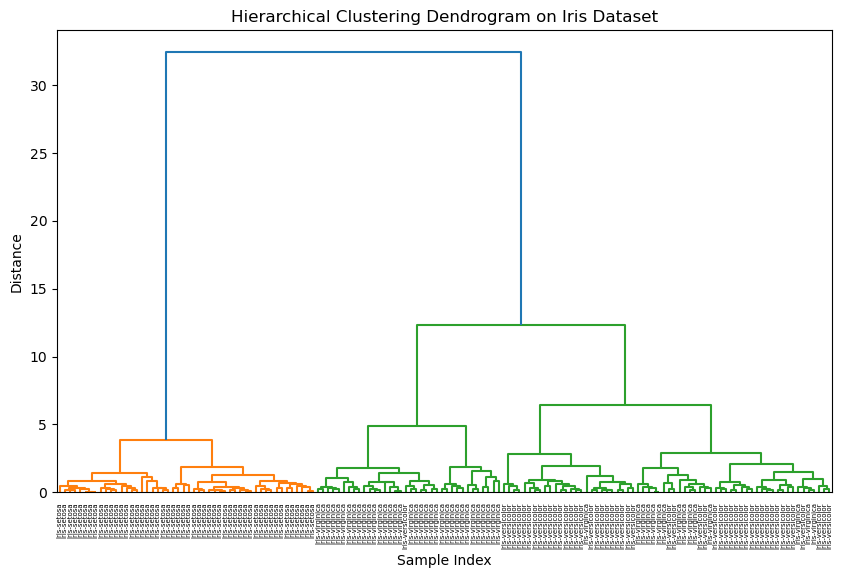

In [30]:
# Hierarchical Clustering and Dendrogram:

Z = linkage(features,method='ward')


plt.figure(figsize=(10,6))
dendrogram(Z,labels=df['Species'].values)
plt.title("Hierarchical Clustering Dendrogram on Iris Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [31]:
#Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

In [34]:
hierachical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierachical_lb = hierachical.fit_predict(features)
df['Hierachical_Cluster'] = hierachical_lb

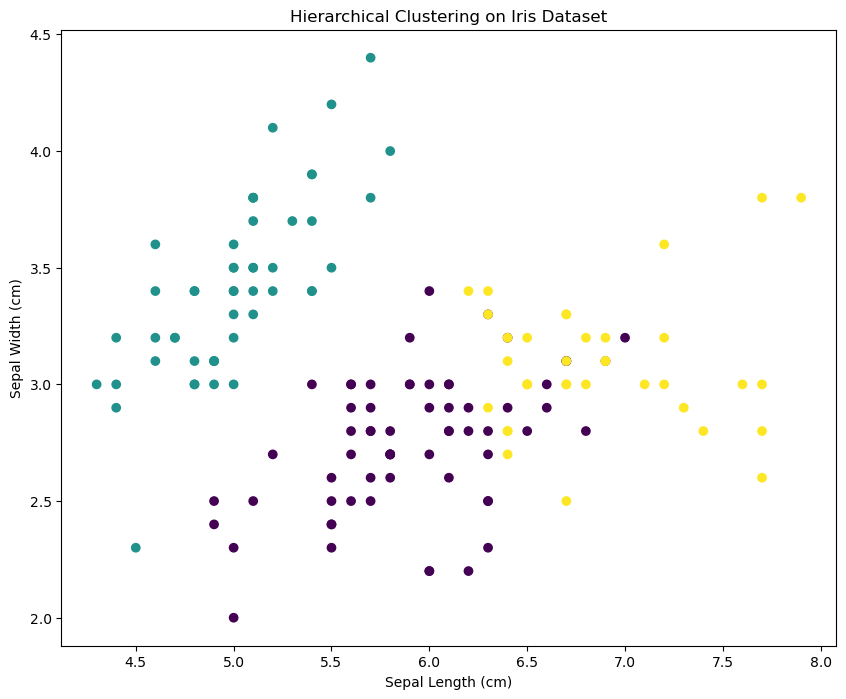

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c = hierachical_lb, cmap='viridis')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()